In [ ]:
!pip install lime

In [ ]:
!pip install opencv-python

In [1]:
import tensorflow as tf

# Check if TensorFlow is using the GPU
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    print("TensorFlow is using the GPU.")
    for gpu in physical_devices:
        print("GPU: ", gpu)
else:
    print("TensorFlow is not using the GPU.")

2024-08-01 15:49:15.157121: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-01 15:49:15.178738: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-01 15:49:15.185397: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-01 15:49:15.203711: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorFlow is using the GPU.
GPU:  PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


I0000 00:00:1722527357.415997  236864 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1722527357.457761  236864 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1722527357.460813  236864 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


In [ ]:
!pip install tensorflow[and-cuda]

In [51]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img, load_img
from lime.lime_image  import LimeImageExplainer, SegmentationAlgorithm
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

I0000 00:00:1722527365.056118  236864 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1722527365.059712  236864 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1722527365.062475  236864 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1722527366.573181  236864 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

'/device:GPU:0'

In [3]:

from PIL import Image

import os
import cv2 as cv
import glob as gb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Model, layers, Sequential, optimizers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import keras
from tensorflow.keras import callbacks, layers, Model

In [4]:
train_dir='/home/sridhanya_ganapathi_team_neustar/plant/data/new_plant_diseases_dataset_augmented/New_Plan_Diseases_Dataset_Augmented/train'
valid_dir='/home/sridhanya_ganapathi_team_neustar/plant/data/new_plant_diseases_dataset_augmented/New_Plan_Diseases_Dataset_Augmented/val'
test_dir='/home/sridhanya_ganapathi_team_neustar/plant/data/test/test'

In [5]:
Size=224
X_test=[]
y_test=[]

In [6]:
import tensorflow as tf
train_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    rescale=1/255.0,
).flow_from_directory(train_dir,batch_size=16,target_size=(Size,Size),subset="training",shuffle=True)
     

Found 70295 images belonging to 38 classes.


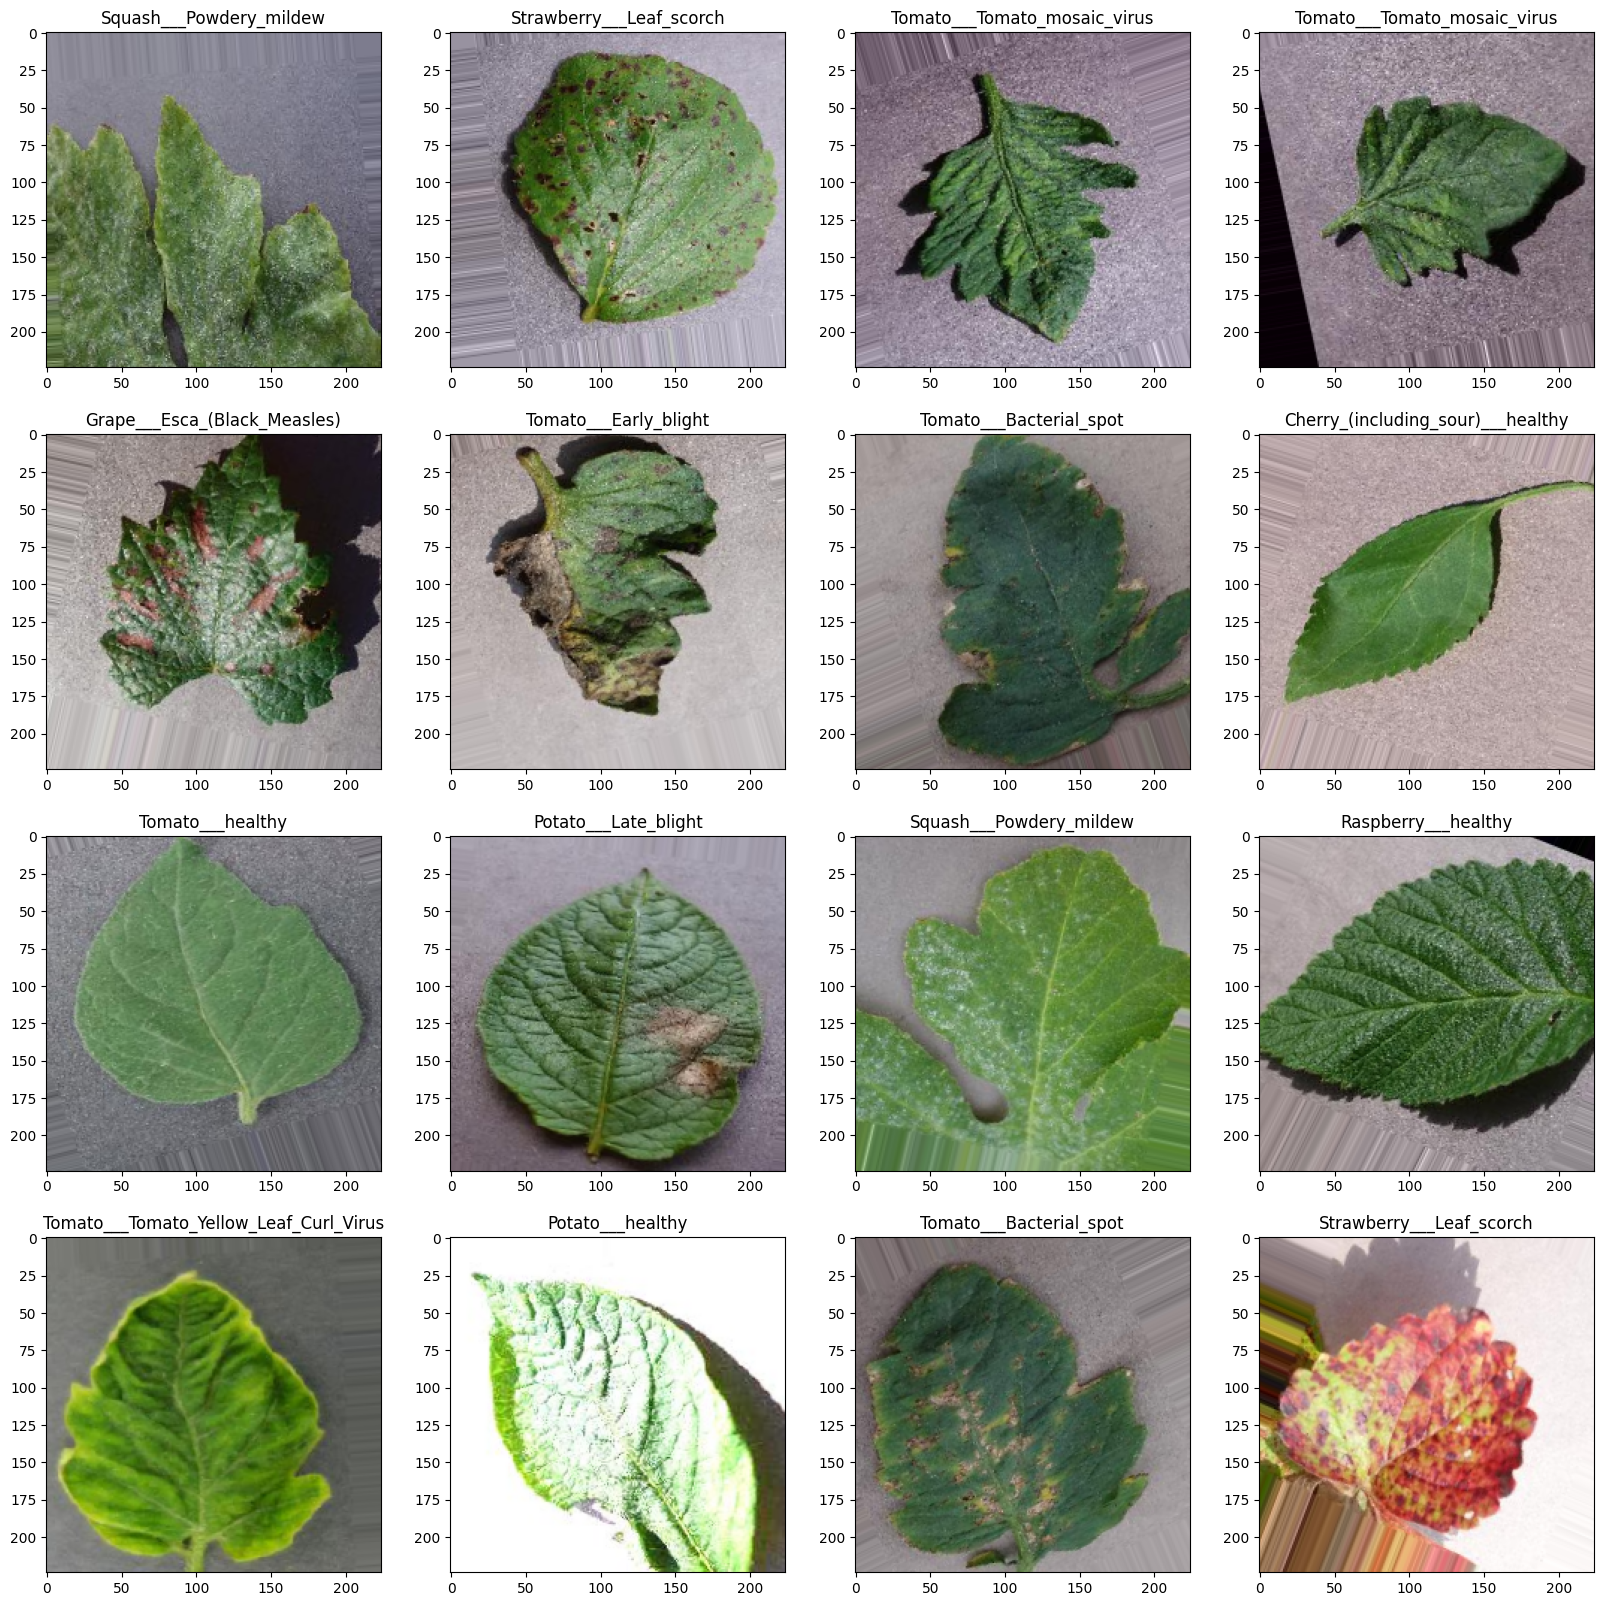

In [7]:
classes=list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in train_generator:

    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    # show the plot
    plt.show()
    break

In [8]:
print(classes)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [9]:
valid_generator=tf.keras.preprocessing.image.ImageDataGenerator(    rescale=1/255.0,).flow_from_directory(valid_dir,batch_size=16,target_size=(Size,Size),shuffle=False)

Found 17573 images belonging to 38 classes.


In [10]:
X_test=[]
for folder in os.listdir(test_dir):
    files=gb.glob(test_dir+'/*.JPG')
    for file in files :  
        img=cv.imread(file) 
        X_test.append(cv.resize(img,(Size,Size))) 

In [11]:
X_test=np.array(X_test)
print(X_test.shape)

(1089, 224, 224, 3)


In [12]:
X_test=X_test/255.0

In [13]:
import keras 
from keras.layers import Flatten , Dense , Dropout , BatchNormalization , MaxPooling2D ,Conv2D 
from keras.models import Sequential
from tensorflow.keras.callbacks  import EarlyStopping ,ReduceLROnPlateau ,ModelCheckpoint

In [14]:
EarlyStop=EarlyStopping(patience=10,restore_best_weights=True)
Reduce_LR=ReduceLROnPlateau(monitor='val_accuracy',verbose=2,factor=0.5,min_lr=0.00001)
model_check=ModelCheckpoint('model.hdf5.keras',monitor='val_loss',verbose=1,save_best_only=True)
callback=[EarlyStop , Reduce_LR,model_check]


In [15]:
inception_model = InceptionV3(input_shape= (Size, Size, 3), 
                              include_top = False,      
                              weights = "imagenet")

I0000 00:00:1722527373.326366  236864 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1722527373.328606  236864 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1722527373.330471  236864 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1722527373.332453  236864 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [16]:
for layer in inception_model.layers:
    layer.trainable = False

In [17]:
# Taking output from 'mixed8' layer
last_layer = inception_model.get_layer('mixed9')
print('Last Layer Output Shape:', last_layer.output.shape)
last_output = last_layer.output

Last Layer Output Shape: (None, 5, 5, 2048)


In [18]:
x = layers.Flatten()(last_output)

x = layers.Dense(2048, activation='relu')(x)

x = layers.Dense(1024, activation='relu')(x)

x = layers.Dropout(0.2)(x)

x = layers.Dense(38, activation='softmax')(x)

inception3 = Model(inception_model.input, x)

In [19]:
inception3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [20]:
history=inception3.fit(train_generator,validation_data=valid_generator,epochs=100,batch_size=32,
                  steps_per_epoch=len(train_generator)//16,validation_steps=len(valid_generator)//16,
                  callbacks=callback, verbose=1)

Epoch 1/100


/opt/conda/envs/llm/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1722527383.070598  236967 service.cc:146] XLA service 0x7fda340019e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1722527383.070670  236967 service.cc:154]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2024-08-01 15:49:43.243129: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-01 15:49:45.497285: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8900


  2/274 ━━━━━━━━━━━━━━━━━━━━ 21s 77ms/step - accuracy: 0.0156 - loss: 4.8777       

I0000 00:00:1722527393.892931  236967 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.4049 - loss: 2.9436
Epoch 1: val_loss improved from inf to 0.67125, saving model to model.hdf5.keras
274/274 ━━━━━━━━━━━━━━━━━━━━ 79s 223ms/step - accuracy: 0.4056 - loss: 2.9388 - val_accuracy: 0.7941 - val_loss: 0.6712 - learning_rate: 0.0010
Epoch 2/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.7771 - loss: 0.7520
Epoch 2: val_loss improved from 0.67125 to 0.20849, saving model to model.hdf5.keras
274/274 ━━━━━━━━━━━━━━━━━━━━ 55s 201ms/step - accuracy: 0.7771 - loss: 0.7518 - val_accuracy: 0.9292 - val_loss: 0.2085 - learning_rate: 0.0010
Epoch 3/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.8163 - loss: 0.6285
Epoch 3: val_loss did not improve from 0.20849
274/274 ━━━━━━━━━━━━━━━━━━━━ 44s 162ms/step - accuracy: 0.8163 - loss: 0.6284 - val_accuracy: 0.9099 - val_loss: 0.2877 - learning_rate: 0.0010
Epoch 4/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.8199 - loss: 0.5795
Epoch 4: va

2024-08-01 16:02:10.254016: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-08-01 16:02:10.254357: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
/opt/conda/envs/llm/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 17: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 17: val_loss did not improve from 0.04809
274/274 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.8693 - loss: 0.6107 - val_accuracy: 0.8606 - val_loss: 0.4485 - learning_rate: 0.0010


2024-08-01 16:02:15.378389: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


In [21]:
ModelLoss, ModelAccuracy = inception3.evaluate(valid_generator)
print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy))

1099/1099 ━━━━━━━━━━━━━━━━━━━━ 38s 34ms/step - accuracy: 0.9034 - loss: 0.3673
Test Loss is 0.44684067368507385
Test Accuracy is 0.8715643286705017


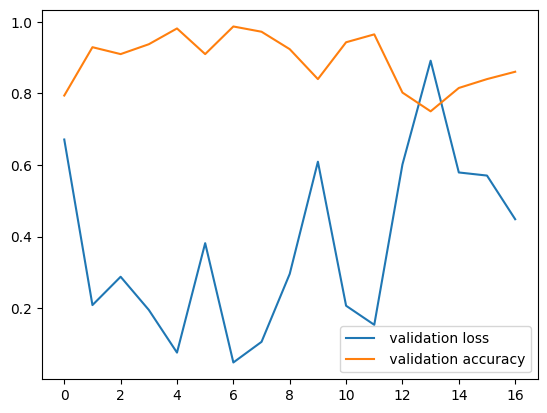

In [22]:
plt.plot(history.history['val_loss'],label=' validation loss')
plt.plot(history.history['val_accuracy'],label=' validation accuracy')
plt.legend()

In [23]:
inceptionv3_accuracy = history.history['val_accuracy'][len(history.history['val_accuracy'])-1]


In [24]:
alexnet=Sequential([
                Conv2D(96,11,activation='relu',strides=4,input_shape=(Size,Size,3)),
                BatchNormalization(),
                MaxPooling2D(3,strides=2),


                Conv2D(256,5,activation='relu',strides=1),
                MaxPooling2D(3,strides=2),

                Conv2D(384,3,activation='relu',strides=1),
                Conv2D(384,3,activation='relu',strides=1),
                Conv2D(256,3,activation='relu',strides=1),
                MaxPooling2D(3,strides=2),
                Flatten(),
                Dense(4096,activation='relu'),
                Dense(4096,activation='relu'),
                Dense(38,activation='softmax')
])

/opt/conda/envs/llm/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
alexnet.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [26]:
history=alexnet.fit(train_generator,validation_data=valid_generator,epochs=100,batch_size=32,
                  steps_per_epoch=len(train_generator)//16,validation_steps=len(valid_generator)//16,
                  callbacks=callback, verbose=1)


Epoch 1/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.0404 - loss: 3.6342
Epoch 1: val_loss did not improve from 0.04809
274/274 ━━━━━━━━━━━━━━━━━━━━ 52s 165ms/step - accuracy: 0.0404 - loss: 3.6339 - val_accuracy: 0.0000e+00 - val_loss: 3.7178 - learning_rate: 0.0010
Epoch 2/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.0678 - loss: 3.4815
Epoch 2: val_loss did not improve from 0.04809
274/274 ━━━━━━━━━━━━━━━━━━━━ 43s 158ms/step - accuracy: 0.0679 - loss: 3.4815 - val_accuracy: 0.0110 - val_loss: 3.4561 - learning_rate: 0.0010
Epoch 3/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.0701 - loss: 3.4055
Epoch 3: val_loss did not improve from 0.04809
274/274 ━━━━━━━━━━━━━━━━━━━━ 43s 157ms/step - accuracy: 0.0702 - loss: 3.4054 - val_accuracy: 0.0404 - val_loss: 3.3757 - learning_rate: 0.0010
Epoch 4/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.1196 - loss: 3.2443
Epoch 4: val_loss did not improve from 0.04809
274/274 ━━━━━━━━━━━━

In [27]:
ModelLoss, ModelAccuracy = alexnet.evaluate(valid_generator)
print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

1099/1099 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.0397 - loss: 3.5949
Test Loss is 3.576263666152954
Test Accuracy is 0.054060205817222595


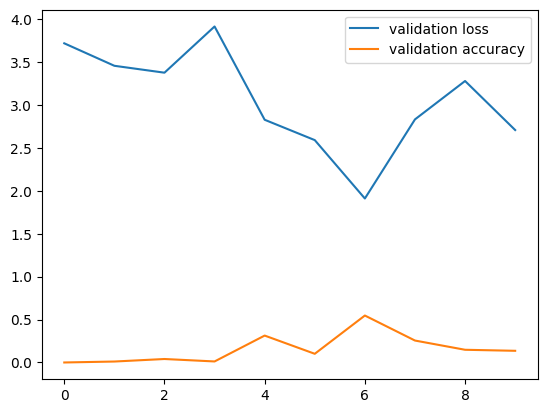

In [28]:
plt.plot(history.history['val_loss'],label='validation loss')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.legend()

In [29]:
alexnet_accuracy = history.history['val_accuracy'][len(history.history['val_accuracy'])-1]


In [30]:
models = ["inceptionv3","alexnet"]
Models = [inception3,alexnet]

accuracies = [inceptionv3_accuracy,alexnet_accuracy]

best_model_index = accuracies.index(max(accuracies))
print("best performing model :",models[best_model_index])
best_model_name = models[best_model_index]
best_model = Models[best_model_index]

best performing model : inceptionv3


In [31]:
predictions=best_model.predict(valid_generator)

1099/1099 ━━━━━━━━━━━━━━━━━━━━ 43s 36ms/step


In [32]:
from sklearn.metrics import classification_report
print(classification_report(valid_generator.classes, predictions.argmax(axis=1)))
 

              precision    recall  f1-score   support

           0       0.69      0.98      0.81       505
           1       0.98      0.85      0.91       497
           2       0.90      0.96      0.93       440
           3       0.95      0.74      0.83       502
           4       0.98      0.92      0.95       454
           5       1.00      0.92      0.96       421
           6       0.99      0.96      0.98       456
           7       0.96      0.81      0.88       410
           8       0.95      1.00      0.97       477
           9       0.83      0.97      0.90       477
          10       1.00      0.97      0.99       465
          11       0.78      0.99      0.87       472
          12       0.99      0.73      0.84       480
          13       0.99      0.98      0.99       430
          14       1.00      0.97      0.98       423
          15       0.76      1.00      0.87       503
          16       0.79      0.98      0.87       459
          17       0.99    

<Axes: >

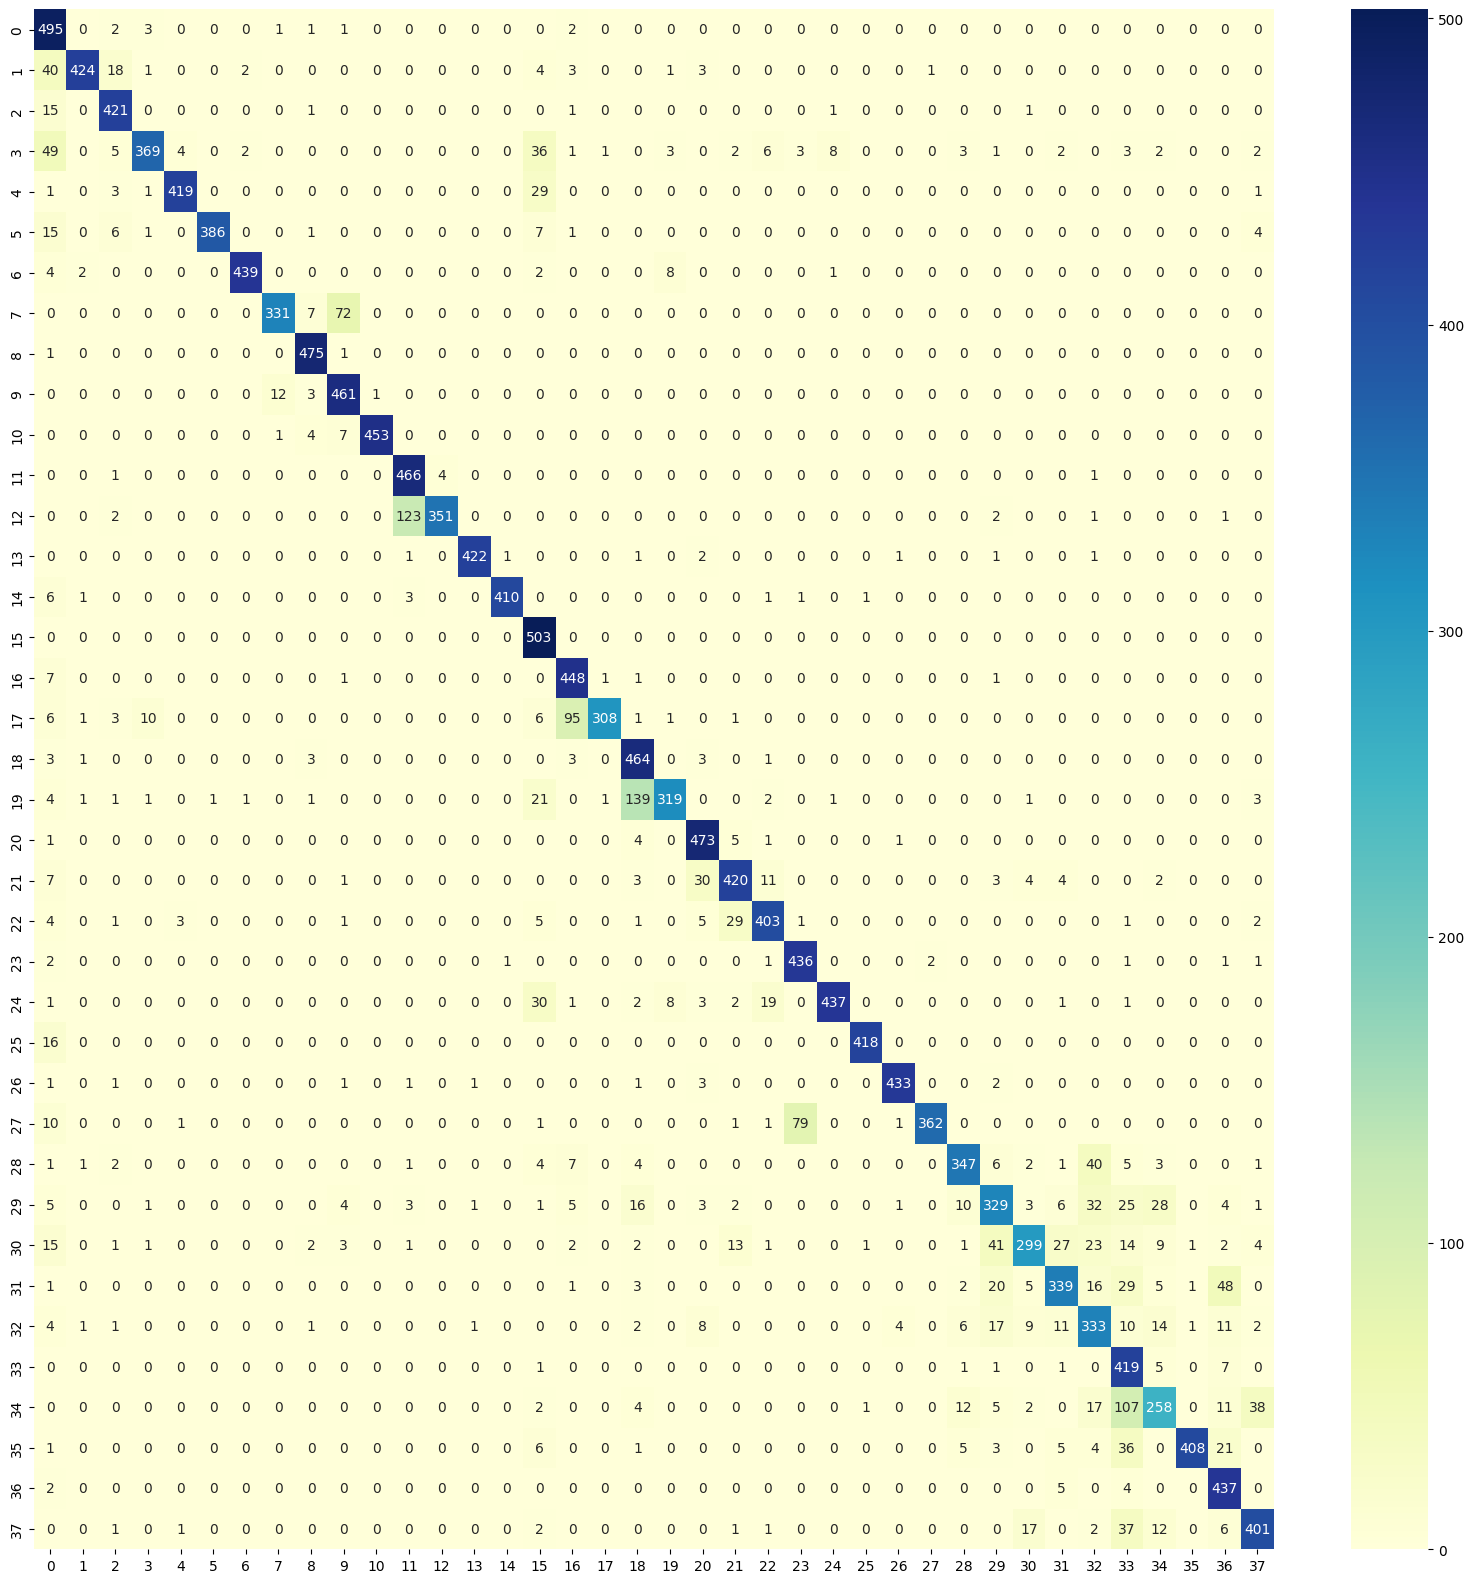

In [33]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(valid_generator.classes, predictions.argmax(axis=1))
plt.figure(figsize=(20,20))
sns.heatmap(cm,  annot=True, fmt="d" ,cmap="YlGnBu")
     


In [34]:
y_pred=best_model.predict(X_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 17s 227ms/step


In [35]:
y_pred[0]

array([5.6234342e-07, 9.9314947e-09, 9.9999261e-01, 1.0806099e-09,
       5.0092801e-11, 6.5304785e-06, 1.1851743e-11, 7.4225959e-10,
       2.4053068e-09, 9.4112308e-11, 1.7954847e-13, 4.6643672e-10,
       3.6256423e-10, 7.9245332e-08, 4.2397067e-12, 1.7282553e-10,
       1.3160664e-07, 1.1726312e-12, 5.6121503e-11, 2.3215819e-12,
       1.6677573e-09, 1.1818397e-08, 2.8990069e-10, 5.6783073e-14,
       1.7266423e-12, 2.5627744e-10, 1.8160613e-08, 2.0090324e-11,
       2.9124996e-08, 1.6983721e-09, 1.9123750e-08, 3.8043086e-11,
       3.1264921e-08, 3.9477488e-09, 6.4608674e-10, 3.6177724e-11,
       5.7791223e-11, 1.5459539e-10], dtype=float32)

In [36]:
predictions=y_pred.argmax(axis=1)

In [37]:
classes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [38]:
predictions

array([ 2, 35, 21, ...,  8, 35, 37])

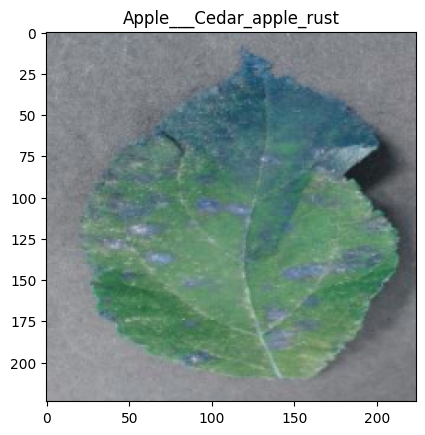

In [39]:
plt.imshow(X_test[0])
plt.title(classes[predictions[0]])
plt.show()

In [41]:
model_json = inception3.to_json()
with open("/home/sridhanya_ganapathi_team_neustar/village/model/inception/inception3.json", "w") as json_file:
  json_file.write(model_json)
  inception3.save("/home/sridhanya_ganapathi_team_neustar/village/model/inception/inception3_Classifier.keras")
  print("Saved model to disk")
  inception3.save_weights("/home/sridhanya_ganapathi_team_neustar/village/model/inception/inception3.weights.h5")
  

Saved model to disk


In [42]:
def load_model_details(model_path):

    # Detect the format and load the model accordingly

    if model_path.endswith('.keras'):

        # Assuming V3 `.keras` format

        print("Loading .keras format model...")

        model = tf.keras.models.load_model(model_path, compile=False)

    elif model_path.endswith('.h5'):

        # Legacy H5 format

        print("Loading .h5 format model...")

        model = tf.keras.models.load_model(model_path, compile=False)

    else:

        # Assuming it's a SavedModel format; use TFSMLayer

        print("Loading SavedModel using TFSMLayer...")

        model = tf.keras.Sequential([

            tf.keras.layers.TFSMLayer(model_path, call_endpoint='serving_default')

        ])
 
    # Get the target size dynamically

    input_shape = model.input_shape[1:3]
 
    # Find the last convolutional layer name

    last_conv_layer_name = None

    for layer in reversed(model.layers):

        if isinstance(layer, tf.keras.layers.Conv2D):

            last_conv_layer_name = layer.name

            break
 
    return model, last_conv_layer_name, input_shape

def load_label_encoder(train_directory):

    labels = sorted(os.listdir(train_directory))

    label_encoder = {i: label for i, label in enumerate(labels)}

    return label_encoder
 
def get_img_array(img_path, size):

    img = load_img(img_path, target_size=size)

    array = img_to_array(img)

    array = np.expand_dims(array, axis=0)

    return array
 
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):

    grad_model = tf.keras.models.Model(

        inputs=model.inputs, outputs=[model.get_layer(last_conv_layer_name).output, model.output]

    )

    with tf.GradientTape() as tape:

        last_conv_layer_output, preds = grad_model(img_array)

        preds = tf.convert_to_tensor(preds)

        class_channel = preds[:, pred_index]
 
    grads = tape.gradient(class_channel, last_conv_layer_output)

    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]

    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]

    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

    return heatmap.numpy()
 
def save_and_display_gradcam(array, heatmap, alpha=0.8):

    img = array

    heatmap = np.uint8(255 * heatmap)

    jet = plt.cm.jet

    jet_colors = jet(np.arange(256))[:, :3]

    jet_heatmap = jet_colors[heatmap]

    jet_heatmap = array_to_img(jet_heatmap)

    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))

    jet_heatmap = img_to_array(jet_heatmap)

    superimposed_img = jet_heatmap * alpha + img

    superimposed_img = array_to_img(superimposed_img)

    return superimposed_img
 
def generate_splime_mask(img_array, model, num_features, num_samples, segmentation_alg, kernel_size, max_dist, ratio):

    explainer = LimeImageExplainer()

    if segmentation_alg == 'quickshift':

        segmentation_fn = SegmentationAlgorithm('quickshift', kernel_size=kernel_size, max_dist=max_dist, ratio=ratio)

    else:

        segmentation_fn = SegmentationAlgorithm('slic', n_segments=kernel_size, compactness=max_dist, sigma=ratio)

    explanation = explainer.explain_instance(

        img_array, model.predict, top_labels=1, hide_color=0,

        num_samples=num_samples, num_features=num_features, segmentation_fn=segmentation_fn

    )

    temp, mask = explanation.get_image_and_mask(

        explanation.top_labels[0], positive_only=True, num_features=num_features, hide_rest=True

    )

    # Convert grayscale mask to RGB

    if len(mask.shape) == 2:  # Mask is grayscale

        mask = np.stack([mask] * 3, axis=-1)

    return mask
 
def save_and_display_splime(array, mask, alpha=0.6):

    """

    Overlap the LIME mask with the original image and return the superimposed image.

    """

    img = array

    mask = np.uint8(255 * mask)

    mask = array_to_img(mask)

    mask = mask.resize((img.shape[1], img.shape[0]))

    mask = img_to_array(mask)

    superimposed_img = mask * alpha + img

    superimposed_img = array_to_img(superimposed_img)

    return superimposed_img
 
image_counter = 0
 
def classify_image_and_explain(image_path, model_path, train_directory, num_samples, num_features, segmentation_alg, kernel_size, max_dist, ratio):

    global image_counter

    image_counter += 1

    model, last_conv_layer_name, target_size = load_model_details(model_path)

    image = Image.open(image_path).resize(target_size)

    if image.mode != 'RGB':

        image = image.convert('RGB')

    array = img_to_array(image)

    img_array = array / 255.0

    img_array = np.expand_dims(img_array, axis=0)

    label_encoder = load_label_encoder(train_directory)

    preds = model.predict(img_array)

    top_prediction = np.argmax(preds[0])

    top_label = label_encoder[top_prediction]

    top_prob = preds[0][top_prediction]
 
    model.layers[-1].activation = None

    grad_cam_heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

    grad_cam_explanation = save_and_display_gradcam(array, grad_cam_heatmap)

    splime_mask = generate_splime_mask(img_array[0], model, num_features, num_samples, segmentation_alg, kernel_size, max_dist, ratio)

    splime_explanation = save_and_display_splime(array, splime_mask)
 
    # Ensure the explanation directory exists

    if not os.path.exists("explanation"):

        os.makedirs("explanation")
 
    grad_cam_explanation.save(f"explanation/gradcam_explanation_{image_counter}.jpg")

    splime_explanation.save(f"explanation/splime_explanation_{image_counter}.jpg")
 
    print(f"Predicted Label: {top_label}")

    print(f"Probability: {top_prob:.4f}")
 
    return splime_explanation, grad_cam_explanation, top_label, top_prob

 

In [52]:
classify_image_and_explain(
    image_path='/home/sridhanya_ganapathi_team_neustar/plant/data/new_plant_diseases_dataset_augmented//New_Plan_Diseases_Dataset_Augmented/train/Strawberry___Leaf_scorch/82ff54ae-6b13-4475-9926-f765efed7a66___RS_L.Scorch 1106.jpg',
    model_path='/home/sridhanya_ganapathi_team_neustar/village/model/inception/inception3_Classifier.keras',
    train_directory=train_dir,
    num_samples=300,
    num_features=50,
    segmentation_alg='quickshift',
    kernel_size=2,
    max_dist=100,
    ratio=0.1
)

Loading .keras format model...
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


W0000 00:00:1722529740.364486  236864 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1722529740.404068  236864 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1722529740.405184  236864 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1722529740.406301  236864 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1722529740.407434  236864 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1722529740.408568  236864 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1722529740.409726  236864 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1722529740.410856  236864 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1722529740.411994  236864 gp

  0%|          | 0/300 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━

(<PIL.Image.Image image mode=RGB size=224x224>,
 <PIL.Image.Image image mode=RGB size=224x224>,
 'Strawberry___Leaf_scorch',
 0.9999999)

In [53]:
from vertexai.generative_models import GenerativeModel

In [54]:
multimodal_model = GenerativeModel("gemini-1.5-flash")

In [55]:
input_prompt = """As a highly skilled plant pathologist, your expertise is indispensable in our pursuit of maintaining optimal plant health. 
Given the image at {image_url}  contains {leafname} leaf which is classified as {feature}, and your role involves conducting a detailed analysis to identify the specific issues, propose solutions and offer recommendations. 
**Analysis Guidelines:** 
1. **Disease Identification:** Examine the provided information or samples to identify and characterize plant diseases accurately. 
2. **Detailed Findings:** Provide in-depth findings on the nature and extent of the identified plant diseases, including affected plant parts, symptoms, and potential causes. 
3. **Next Steps:** Outline the recommended course of action for managing and controlling the identified plant diseases. This may involve treatment options, preventive measures, or further investigations. 
4. **Recommendations:** Offer informed recommendations for maintaining plant health, preventing disease spread, and optimizing overall plant well-being. 
5. **Important Note:** As a plant pathologist, your insights are vital for informed decision-making in agriculture and plant management. Your response should be thorough, concise, and focused on plant health. 
**Disclaimer:***"Please note that the information provided is based on plant pathology analysis and should not replace professional agricultural advice. Consult with qualified agricultural experts before implementing any strategies or treatments."* 
Your role is pivotal in ensuring the health and productivity of plants. Proceed to analyze the provided information or samples, adhering to the structured""" 



In [56]:
PROJECT_ID = "edl-idaas-rnd-platform-d5ae"  # @param {type:"string"}
LOCATION = "us-central1"  # @param {type:"string"}

# Initialize Vertex AI
import vertexai

vertexai.init(project=PROJECT_ID, location=LOCATION)

In [57]:
from vertexai.preview.vision_models import ImageQnAModel

image_qna_model = ImageQnAModel.from_pretrained("imagetext@001")


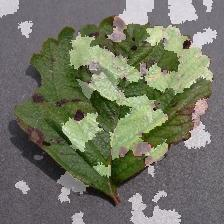

In [61]:
from vertexai.preview.vision_models import Image

# Use either a Google Cloud Storage URI or a local file path.
file_path = (
    "/home/sridhanya_ganapathi_team_neustar/plant/data/explanation/splime_explanation_7.jpg"  # @param {type:"string"}
)

# Load the image file as Image object
cloud_next_image = Image.load_from_file(file_path)
cloud_next_image.show()

In [132]:
from langchain_core.prompts import PromptTemplate

# Define the prompt template
template = input_prompt

# Create a PromptTemplate instance
prompt = PromptTemplate(template=template)

# Prepare the input variables
input_variables = {
    "image_url": "gs://india-dev-rnd/sridhanya/plantvillage/explanation/splime_explanation_7.jpg",  # Replace with your image path or URL
    "leafname": "Strawberry",
    "feature": " Leaf scorch"
}

# Format the prompt with the input variables
formatted_prompt = prompt.format(**input_variables)

# Print the formatted prompt
print(formatted_prompt)

As a highly skilled plant pathologist, your expertise is indispensable in our pursuit of maintaining optimal plant health. 
Given the image at gs://india-dev-rnd/sridhanya/plantvillage/explanation/splime_explanation_7.jpg , Strawberry,  Leaf scorch and your role involves conducting a detailed analysis to identify the specific issues, propose solutions and offer recommendations. 
**Analysis Guidelines:** 
1. **Disease Identification:** Examine the provided information or samples to identify and characterize plant diseases accurately. 
2. **Detailed Findings:** Provide in-depth findings on the nature and extent of the identified plant diseases, including affected plant parts, symptoms, and potential causes. 
3. **Next Steps:** Outline the recommended course of action for managing and controlling the identified plant diseases. This may involve treatment options, preventive measures, or further investigations. 
4. **Recommendations:** Offer informed recommendations for maintaining plant h

In [133]:
from langchain_google_vertexai import ChatVertexAI

# Initialize the Gemini model
llm = ChatVertexAI(model="gemini-1.5-flash")

In [134]:

# Create a HumanMessage with the formatted prompt
message = HumanMessage(content=formatted_prompt)

# Invoke the model response
output = llm.invoke([message])

# Print the model's response
print(output.content)

I am unable to access external websites or specific file locations like the one you provided (gs://india-dev-rnd/sridhanya/plantvillage/explanation/splime_explanation_7.jpg). Therefore, I cannot perform a visual analysis of the image and provide specific details on the strawberry leaf scorch.

However, I can offer a general approach to diagnosing and managing leaf scorch in strawberries based on common causes and solutions:

**1. Disease Identification:**

* **Leaf Scorch:**  Leaf scorch is a general term describing damage to the leaf margins, often appearing brown, dry, and scorched. It can be caused by several factors, including:

    * **Fungal diseases:**  Anthracnose, leaf spot, and powdery mildew can all cause leaf scorch.
    * **Bacterial diseases:**  Bacterial leaf scorch is a serious disease affecting many fruit trees, including strawberries.
    * **Environmental factors:**  Drought, excessive heat, nutrient deficiencies, and improper watering practices can also lead to leaf

In [ ]:
### with image classifier and Image mask

In [124]:
input_prompt = """As a highly skilled plant pathologist, your expertise is indispensable in our pursuit of maintaining optimal plant health. 
Given the image at {image_url} , {leafname}, {feature} and your role involves conducting a detailed analysis to identify the specific issues, propose solutions and offer recommendations. 
**Analysis Guidelines:** 
1. **Disease Identification:** Examine the provided information or samples to identify and characterize plant diseases accurately. 
2. **Detailed Findings:** Provide in-depth findings on the nature and extent of the identified plant diseases, including affected plant parts, symptoms, and potential causes. 
3. **Next Steps:** Outline the recommended course of action for managing and controlling the identified plant diseases. This may involve treatment options, preventive measures, or further investigations. 
4. **Recommendations:** Offer informed recommendations for maintaining plant health, preventing disease spread, and optimizing overall plant well-being. 
5. **Important Note:** As a plant pathologist, your insights are vital for informed decision-making in agriculture and plant management. Your response should be thorough, concise, and focused on plant health. 
**Disclaimer:***"Please note that the information provided is based on plant pathology analysis and should not replace professional agricultural advice. Consult with qualified agricultural experts before implementing any strategies or treatments."* 
Your role is pivotal in ensuring the health and productivity of plants. Proceed to analyze the provided information or samples, adhering to the structured.""" 

    

In [125]:
from langchain_core.prompts import PromptTemplate

# Define the prompt template
template = input_prompt

# Create a PromptTemplate instance
prompt = PromptTemplate(template=template)

# Prepare the input variables
input_variables = {
    "image_url": "gs://india-dev-rnd/sridhanya/plantvillage/explanation/strawberryleaf.jpg",  # Replace with your image path or URL
    "leafname": "Strawberry",
    "feature": "Scab"
}

# Format the prompt with the input variables
formatted_prompt = prompt.format(**input_variables)

# Print the formatted prompt
print(formatted_prompt)

As a highly skilled plant pathologist, your expertise is indispensable in our pursuit of maintaining optimal plant health. 
Given the image at gs://india-dev-rnd/sridhanya/plantvillage/explanation/strawberryleaf.jpg , Strawberry, Scab and your role involves conducting a detailed analysis to identify the specific issues, propose solutions and offer recommendations. 
**Analysis Guidelines:** 
1. **Disease Identification:** Examine the provided information or samples to identify and characterize plant diseases accurately. 
2. **Detailed Findings:** Provide in-depth findings on the nature and extent of the identified plant diseases, including affected plant parts, symptoms, and potential causes. 
3. **Next Steps:** Outline the recommended course of action for managing and controlling the identified plant diseases. This may involve treatment options, preventive measures, or further investigations. 
4. **Recommendations:** Offer informed recommendations for maintaining plant health, prevent

In [126]:

# Create a HumanMessage with the formatted prompt
message = HumanMessage(content=formatted_prompt)

# Invoke the model response
output = llm.invoke([message])

# Print the model's response
print(output.content)

I am unable to access external websites or specific file paths like "gs://india-dev-rnd/sridhanya/plantvillage/explanation/strawberryleaf.jpg". Therefore, I cannot analyze the image you provided to identify the specific issue with the strawberry leaf. 

However, I can provide you with general information on Strawberry Scab, a common disease affecting strawberries, and how to approach its diagnosis and management.

**Strawberry Scab (caused by *Sphaerotheca macularis*):**

* **Identification:** Strawberry Scab is characterized by white, powdery patches on the leaves, stems, and fruit of strawberry plants. The patches may be small and scattered initially, but can become larger and more numerous, eventually covering the entire leaf surface. 
* **Detailed Findings:** The disease can cause leaf distortion, reduced fruit yield, and a decrease in fruit quality. The fungus thrives in humid conditions and can spread easily through wind and water.
* **Next Steps:**
    * **Cultural Control:**
  

## Strawberry Leaf Scorch Analysis 

**1. Disease Identification:** The image at the provided link shows characteristic symptoms of **Leaf Scorch**, a common fungal disease in strawberries caused by the pathogen *Diplocarpon earliana*. 

**2. Detailed Findings:**

* **Affected Plant Parts:** Primarily leaves, but can also affect petioles, fruit stems, and fruit caps.
* **Symptoms:**
    * Small, purplish spots on the upper leaf surface, often starting near the leaf margins.
    * Spots enlarge and develop into irregular, reddish-brown blotches with purplish borders.
    * Severely

In [ ]:
from vertexai.preview.vision_models import ImageQnAModel

image_qna_model = ImageQnAModel.from_pretrained("imagetext@001")

In [ ]:
from vertexai.preview.vision_models import Image

# Use either a Google Cloud Storage URI or a local file path.
file_path = (
    "gs://india-dev-rnd/sridhanya/plantvillage/explanation/sri.jpg"  # @param {type:"string"}
)

# Load the image file as Image object
cloud_next_image = Image.load_from_file(file_path)
cloud_next_image.show()

In [ ]:
# Ask a question about the image
image_qna_model.ask_question(
    image=cloud_next_image, question="What is this leaf?"
)

In [69]:
from google.cloud import storage
import os

def upload_image_to_gcs(bucket_name, source_file_name, destination_blob_name):
    """Uploads an image to Google Cloud Storage.

    Args:
        bucket_name: Your Cloud Storage bucket name.
        source_file_name: The path to the local image file.
        destination_blob_name: The name of the blob (object) to create in GCS.
    """

    # Initialize a Cloud Storage client
    storage_client = storage.Client()

    # Get a reference to the bucket
    bucket = storage_client.bucket(bucket_name)

    # Create a new blob (object) in the bucket
    blob = bucket.blob(destination_blob_name)

    # Upload the file to GCS
    blob.upload_from_filename(source_file_name)

    print(f"File {source_file_name} uploaded to {destination_blob_name}.")

In [68]:
upload_image_to_gcs("india-dev-rnd", "/home/sridhanya_ganapathi_team_neustar/plant/data/new_plant_diseases_dataset_augmented/New_Plan_Diseases_Dataset_Augmented/train/Strawberry___Leaf_scorch/82ff54ae-6b13-4475-9926-f765efed7a66___RS_L.Scorch 1106.jpg", 
                    "gs://india-dev-rnd/sridhanya/plantvillage/explanation")

File /home/sridhanya_ganapathi_team_neustar/plant/data/new_plant_diseases_dataset_augmented/New_Plan_Diseases_Dataset_Augmented/train/Strawberry___Leaf_scorch/82ff54ae-6b13-4475-9926-f765efed7a66___RS_L.Scorch 1106.jpg uploaded to gs://india-dev-rnd/sridhanya/plantvillage/explanation.


In [92]:
model, last_conv_layer_name, target_size = load_model_details('/home/sridhanya_ganapathi_team_neustar/village/model/inception/inception3_Classifier.keras')


Loading .keras format model...


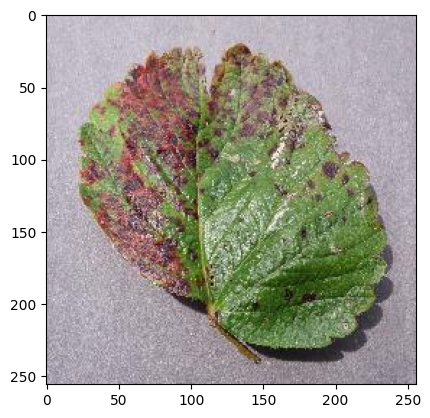

In [102]:
from PIL import Image
image = Image.open("/home/sridhanya_ganapathi_team_neustar/plant/data/new_plant_diseases_dataset_augmented/New_Plan_Diseases_Dataset_Augmented/train/Strawberry___Leaf_scorch/ce15eb73-b289-47f6-8321-17e3ff81b723___RS_L.Scorch 0992_flipLR.JPG")

# Show the image
plt.imshow(image)

In [135]:
import gradio as gr
from PIL import Image
import io

# # Function to process the image and generate output text
def run_predict(image_path):
    print(image_path)
    # image = image_file#Image.open(image_path).resize(target_size)
    image = Image.open(image_path)
    # plt.imshow(image)
    # if image.mode != 'RGB':
    image = image.convert('RGB').resize(target_size)
    array = img_to_array(image)
    img_array = array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
   
    label_encoder = load_label_encoder(train_dir)
   
    preds = model.predict(img_array)
    top_prediction = np.argmax(preds[0])
    top_label = label_encoder[top_prediction]
    top_prob = preds[0][top_prediction]

    splime_explanation, grad_cam_explanation, top_label, top_prob = classify_image_and_explain(
        image_path=image_path,
        model_path='/home/sridhanya_ganapathi_team_neustar/village/model/inception/inception3_Classifier.keras',
        train_directory=train_dir,
        num_samples=300,
        num_features=50,
        segmentation_alg='quickshift',
        kernel_size=2,
        max_dist=100,
        ratio=0.1
    )

    template = input_prompt

    # Create a PromptTemplate instance
    prompt = PromptTemplate(template=template)
    
    # Prepare the input variables
    input_variables = {
        "image_url": "gs://india-dev-rnd/sridhanya/plantvillage/explanation/strawberryleaf.jpg",  # Replace with your image path or URL
        "leafname": "Strawberry",
        "feature": "Scab"
    }
    
    # Format the prompt with the input variables
    formatted_prompt = prompt.format(**input_variables)
    
    # Print the formatted prompt
    # Create a HumanMessage with the formatted prompt
    message = HumanMessage(content=formatted_prompt)
    
    # Invoke the model response
    output = llm.invoke([message])
    

    
    return splime_explanation, grad_cam_explanation, top_label, top_prob, output.content

# Create Gradio interface
interface = gr.Interface(
    fn=run_predict,
    inputs=[
        gr.Textbox(label="Leaf Image (choose image) file path", type="text"),
    ],
    outputs=[
        gr.Image(label="LIME Explanation"),
        gr.Image(label="GradCAM Explanation"),
        gr.Textbox(label="Predicted Label"),
        gr.Textbox(label="Probability Score"),
        gr.Textbox(label="Vlm Explanation"),
    ],
    title="Image Classification with LIME & GRAD-CAM Explanation",
    description="Upload an image, provide the model path and training directory, and get the classification along with LIME and Grad-CAM explanations."
)

# Launch the application
if __name__ == "__main__":
    interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7880
Running on public URL: https://033682f7d716a6a417.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
